### Load Dataset & Preview

In [1]:
import pandas as pd

# Load full dataset
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Check columns related to satisfaction
df[
    [
        "patient_id",
        "age",
        "gender",
        "state",
        "doctor_id",
        "doctor_specialty",
        "satisfaction_score",
    ]
].head()

,patient_id,age,gender,state,doctor_id,doctor_specialty,satisfaction_score
0,PID0001,4,Other,West Bengal,DID008,Cardiology,1
1,PID0002,26,Other,Maharashtra,DID023,Oncology,6
2,PID0003,13,Female,Tamil Nadu,DID020,Pulmonology,10
3,PID0004,6,Other,West Bengal,DID025,Pulmonology,6
4,PID0005,69,Other,Maharashtra,DID006,Endocrinology,1


### Basic Summary Statistics

In [2]:
# Basic stats on satisfaction score
print(df["satisfaction_score"].describe())

# Check for missing values
print(df["satisfaction_score"].isna().sum())

count    500.000000
mean       5.816000
std        2.730027
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: satisfaction_score, dtype: float64
0


### Satisfaction by Gender, State, Age Group

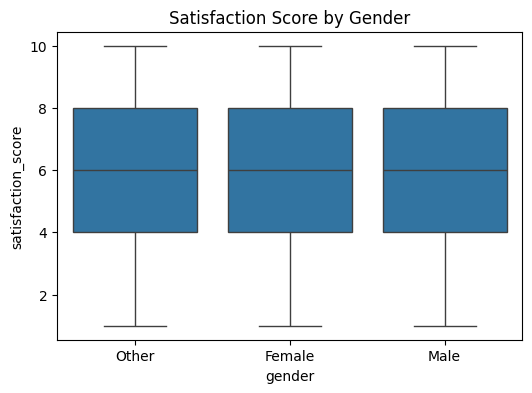

C:\Users\HP\AppData\Local\Temp\ipykernel_12676\53041667.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_group", y="satisfaction_score", data=df, ci=None)


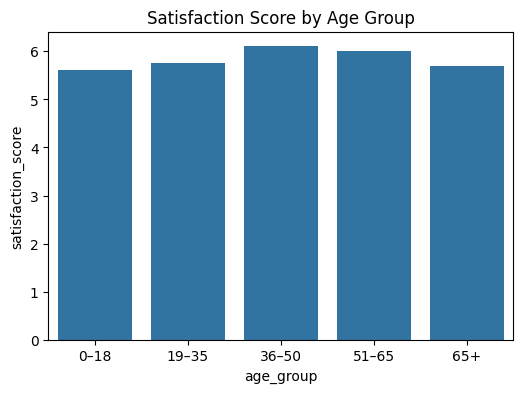

🏆 Top 5 states by avg. satisfaction:
 state
Tamil Nadu     6.173913
Karnataka      6.012658
Gujarat        5.845070
West Bengal    5.703297
Delhi          5.688312
Name: satisfaction_score, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output folder
os.makedirs("../visuals/plots", exist_ok=True)

# Age groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 35, 50, 65, 100],
    labels=["0–18", "19–35", "36–50", "51–65", "65+"],
)

# Boxplot: Satisfaction by gender
plt.figure(figsize=(6, 4))
sns.boxplot(x="gender", y="satisfaction_score", data=df)
plt.title("Satisfaction Score by Gender")
plt.savefig("../visuals/plots/satisfaction_by_gender.png")
plt.show()

# Barplot: Satisfaction by age group
plt.figure(figsize=(6, 4))
sns.barplot(x="age_group", y="satisfaction_score", data=df, ci=None)
plt.title("Satisfaction Score by Age Group")
plt.savefig("../visuals/plots/satisfaction_by_age_group.png")
plt.show()

# Top 5 states by average satisfaction
state_avg = (
    df.groupby("state")["satisfaction_score"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
print("🏆 Top 5 states by avg. satisfaction:\n", state_avg)

### Doctor-wise Satisfaction

In [5]:
# Doctor avg satisfaction
doc_avg = (
    df.groupby("doctor_id")[["satisfaction_score"]]
    .mean()
    .sort_values("satisfaction_score", ascending=False)
)

# Top 5 doctors
top5_docs = doc_avg.head(5)
print("🏅 Top 5 doctors by satisfaction:\n", top5_docs)

# Save to file
top5_docs.to_csv("../data/processed/cleaned/top5_doctors_by_satisfaction.csv")

🏅 Top 5 doctors by satisfaction:
            satisfaction_score
doctor_id                    
DID007               7.000000
DID001               6.750000
DID022               6.666667
DID009               6.166667
DID025               6.166667


### Export Summary for Power BI

In [6]:
# Save age group + gender summary
summary = df.groupby(["age_group", "gender"])["satisfaction_score"].mean().reset_index()
summary.to_csv("../data/processed/cleaned/satisfaction_summary_by_demo.csv", index=False)

print("✅ Exported summary to /data/processed/cleaned")

C:\Users\HP\AppData\Local\Temp\ipykernel_12676\3119888774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(["age_group", "gender"])["satisfaction_score"].mean().reset_index()


✅ Exported summary to /data/processed/cleaned
